In [53]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display,clear_output
from IPython.core.display import Javascript


In [48]:
def show_chart(value):
    topic_id =value
    data = requests.get(f"http://{BASE_URL}/fundamental/getCFTCInstrumentRecordById",params={'instrumentId':topic_id}).json()['data']
    df = pd.DataFrame(data)
    df['report_date'] = pd.to_datetime(df['report_date'])
    # Plot the data
    plt.figure(figsize=(20,10))
    plt.plot(df['report_date'], df['open_interest_all'])
    # add title 
    plt.title(f"Open Interest {list(catergory_dict.keys())[topic_id-1]}")

Dropdown(description='Data Type:', index=52, options=(('CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE', 1), ('…

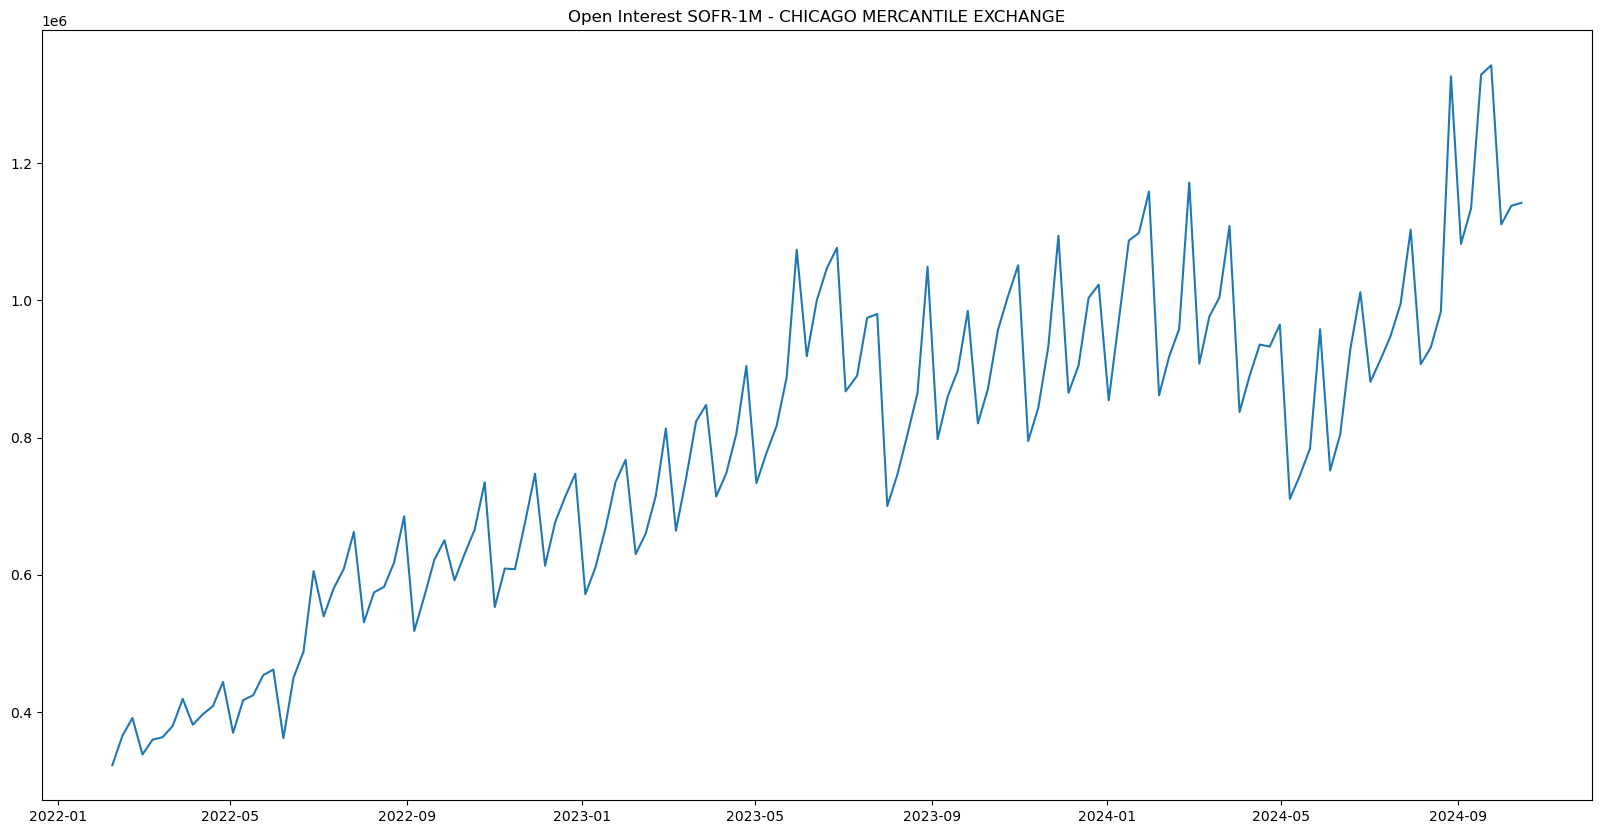

In [56]:
# Get the data from the API
from IPython.core.magic import register_cell_magic
BASE_URL = "18.180.162.113:9888"
CFTC_Category= requests.get(f"http://{BASE_URL}/fundamental/getCFTCInstrument").json()['data']
catergory_dict ={}
[catergory_dict.update({i['instrument_name']:i['instrument_id']}) for i in CFTC_Category]

dropdown = widgets.Dropdown(
    options=list(catergory_dict.items()),
    description='Data Type:',
)

display(dropdown)
def execute_next_cell(change):
    ip = get_ipython()
    clear_output(wait=True)
    display(dropdown)
    show_chart(dropdown.value)

dropdown.observe(execute_next_cell, names='value')